# Suicide and happiness
High suicide rates are often cited as evidence of social failure. Despite this, some countries and regions that do very well in terms of happiness have among the highest suicide rates. This dataset visualization explores this paradox using global data on suicide and self-reported life satisfaction.

Suicide is the ultimate act of desperate unhappiness, marking the point when life is going so badly, that no life at all is better than going on living. High suicide rates are often cited as evidence of social failure, as in Eastern Europe and the Soviet Union under communism. So it comes as a surprise that countries that do very well in life satisfaction, such as Finland, have among the highest suicide rates in Western Europe, or that the states in the ‘suicide belt’ in the United States, which stretches up the Rocky Mountains from Arizona to Montana, and on to Alaska, should be among those with the highest life evaluation.

In this study, i again confirm the paradox of high suicide rates and high life evaluation – i find that some of the factors that correlate with happiness also correlate with low suicide rates, but that just as many do not. 

According to the Centers for Disease Control and Prevention (CDC) WISQARS Leading Causes of Death Reports, in 2019:
- Suicide was the tenth leading cause of death overall in the United States, claiming the lives of over 47,500 people.
- Suicide was the second leading cause of death among individuals between the ages of 10 and 34, and the fourth leading cause of death among individuals between the ages of 35 and 44.
- There were nearly two and a half times as many suicides (47,511) in the United States as there were homicides (19,141).

## Happiness rating
The World Happiness 2019, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th.


## References:
https://hdr.undp.org/en/indicators/137506

https://databank.worldbank.org/source/world-development-indicators

### Feature Tasks and Requirements

- [x] Select 2 Kaggle data sets that are suitable for the story you want to tell.
- [x] Make sure the data set has csv file/s to download
- [ ] Optionally use dataset from another source.
- [x] Load the data you receive into a Pandas DataFrame
- [x] Analyze dataset.
- [x] Verbalize your insights in Markdown cells.
- [x] Visualize your insights in several ways.
- [x] Have at least two visualizations per data set.
- [x] Use Seaborn Example Gallery for inspiration.
- [x] Notebook should have professional polish
- [ ] Tests

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
suicide_data=pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
suicide_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
happiness_data=pd.read_csv('../input/world-happiness/2019.csv')
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Basic facts about suicide
Before looking at how things change over time, we shall observe a few basic facts about suicide:
- Men are far more prone to commiting suicide than women, or at least this is what the data shows.
- Young people, adolescents in particular, are NOT at the greatest risk. See the charts below. These are only examples, but this general pattern comes up time and again.
- There are considerable differences between countries even after age standardization. Recall the WHO map above.


Some part of the observed differences between countries and demographic groups may be explained by underreporting, biases and other issues with acknowledgment and classification of suicides.

In [6]:
# having 'years' in the age group seems unnecessary, and '05-14' will sort better than '5-14'
suicide_data.loc[:, 'age'] = suicide_data['age'].str.replace(' years','')
suicide_data.loc[suicide_data['age'] == '5-14', 'age'] = '05-14'

# suicides/100k rate calculation
suicide_data['suicides/100k pop'] = suicide_data['suicides_no'] / (suicide_data['population'] / 100000)

# preview
pd.concat([suicide_data[:2], suicide_data[10000:10002], suicide_data[-2:]])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.711409,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.194805,Albania1987,NaN,"2,156,624,900",796,Silent
10000,Germany,2014,male,35-54,2444,11949414,20.452886,Germany2014,0.916,"3,890,606,893,347",50167,Generation X
10001,Germany,2014,male,25-34,750,5179803,14.479315,Germany2014,0.916,"3,890,606,893,347",50167,Millenials
27818,Uzbekistan,2014,female,05-14,44,2631600,1.671987,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74,21,1438935,1.459413,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


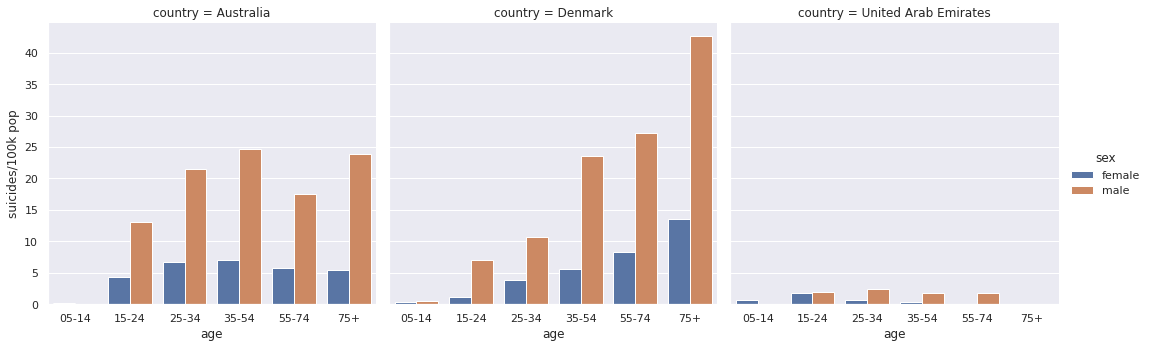

In [7]:
# seaborn settings reset
sns.set()

# chart data
cd = (suicide_data.loc[(suicide_data['country'].isin(['Australia','Denmark','United Arab Emirates'])) &
     (suicide_data['year'] == 2009), ['country','sex','age','suicides/100k pop']] .sort_values(['sex','age']))


sns.catplot(x='age', hue='sex', col='country', y='suicides/100k pop', data=cd, kind='bar', col_wrap=3)

### Organizing the data set 

In [8]:
suicide_data.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(suicide_data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


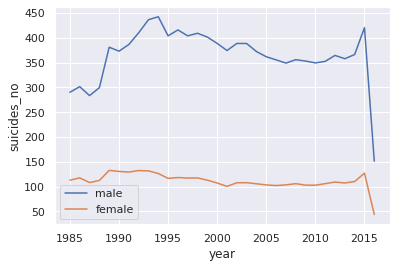

In [9]:
df_men = suicide_data[suicide_data.sex == "male"]
df_women = suicide_data[suicide_data.sex == "female"]
sns.lineplot(df_men.year, suicide_data.suicides_no, ci = None)
sns.lineplot(df_women.year, suicide_data.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

### Here according to studies and as you can see in the figuer below we can see that success and happiness are not synonymous

Suicide rates are based on the number of people who have died by suicide per 100,000 population.

Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.

None None

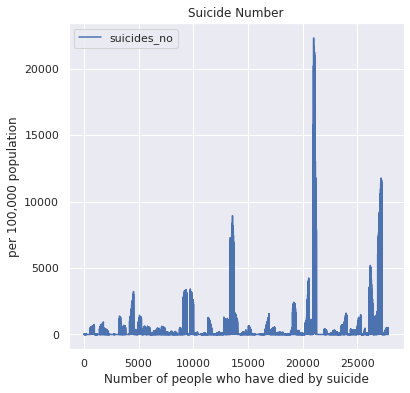

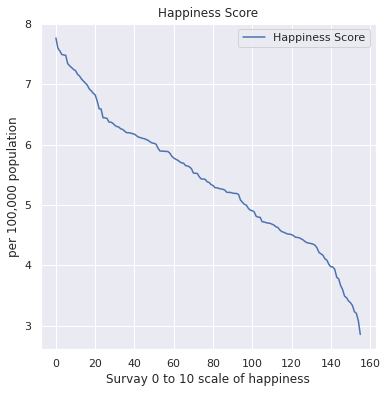

In [10]:
x= suicide_data['suicides_no']
y= happiness_data['Score']

def ploter(y1):
    plt.figure(figsize=(6,6))
    plt.plot(y1,label='suicides_no')
    
    #To show labels
    plt.legend()
    plt.xlabel('Number of people who have died by suicide')
    plt.ylabel('per 100,000 population')
    
    # Title
    plt.title('Suicide Number')


def ploter2(y2):
    plt.figure(figsize=(6,6))
    plt.plot(y2,label='Happiness Score')
    
    #To show labels
    plt.legend()
    plt.xlabel('Survay 0 to 10 scale of happiness')
    plt.ylabel('per 100,000 population')
    
    # Title
    plt.title('Happiness Score')
    

print(ploter(x),ploter2(y) ,end='')

#### Obviously, the suicide rate is getting higher when the age is higher. That is, age is a factor of suicide.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


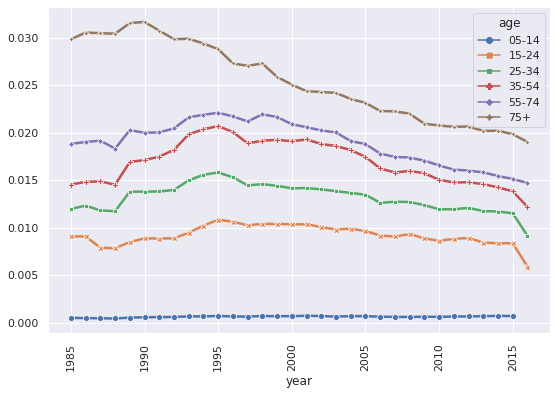

In [11]:
df_age = suicide_data.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

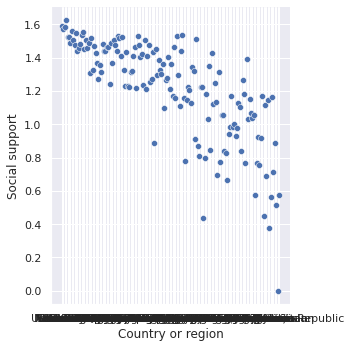

In [12]:
sns.set_theme()
sns.relplot(x="Country or region", y="Social support",data=happiness_data)